In [1]:
# api packages
import pyTwitter
twitter = pyTwitter.TwitterAPI()

# data packages
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_facecolor'

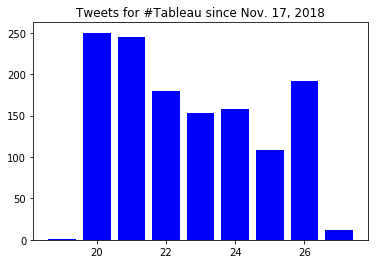

In [3]:
start_dt = datetime(2018, 11, 20)
tab = twitter.get_tweets_since('#Tableau', start_dt)
pbi = twitter.get_tweets_since('#PowerBI', start_dt)
tab['day'] = tab.apply(twitter.get_day, axis=1)
pbi['day'] = pbi.apply(twitter.get_day, axis=1)

In [154]:
def build_bar_chart(df, search_term, dt):
    xy = get_xy(df)
    plt.bar(xy[0], xy[1])
    plt.title('Tweets for {} since {}'.format(search_term, dt), color='white')
    plt.xlabel('Day', color='white')
    plt.ylabel('Tweet Count', color='white')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.text(max(xy[0])-2, max(xy[1])-(max(xy[1])/10), 'Mean: ' + str(round(np.mean(xy[1]), 4)))
    plt.show()
    
def get_xy(df):
    data = df.groupby(by=['day'])['day'].count()
    data_dict = data.to_dict()
    x = list(data_dict.keys())
    y = list(data_dict.values())
    return x, y
    
def build_dual_bar_chart(df1, df2, search_term, dt):
    xy = get_xy(df1)
    xy2 = get_xy(df2)
    x2  = []
    for n in get_xy(df2)[0]:
        x2.append(n + .35)
    p1 = plt.bar(xy[0], xy[1], color = '#4c75a2', width = 0.35)
    p2 = plt.bar(x2, xy2[1], color = '#e9c310', width = 0.35)
    plt.title('Tweets for {} since {}'.format(search_term, dt), color='white')
    plt.xlabel('Day', color='white')
    plt.ylabel('Tweet Count', color='white')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.legend((p1[0], p2[0]), ('#Tableau', '#PowerBI'))
    #plt.text(max(xy[0])-2, max(xy[1])-(max(xy[1])/10), 'Mean: ' + str(round(np.mean(xy[1]), 4)))
    #plt.show()

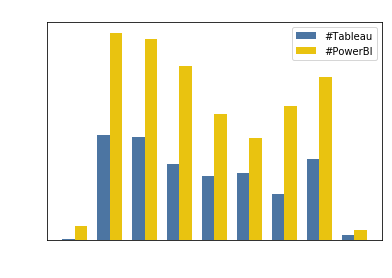

In [155]:
build_dual_bar_chart(tab, pbi, '#Tableau vs. #PowerBI', 'Nov. 20, 2018')